<a href="https://colab.research.google.com/github/McATung/AI/blob/main/CNN_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/tiền/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 220 images belonging to 11 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/tiền/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 110 images belonging to 11 classes.


In [ ]:
training_data.class_indices

{'100000VND': 0,
 '10000VND': 1,
 '1000VND': 2,
 '200000VND': 3,
 '20000VND': 4,
 '2000VND': 5,
 '200VND': 6,
 '500000VND': 7,
 '50000VND': 8,
 '5000VND': 9,
 '500VND': 10}

In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 43808)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
7/7 [==============================] - 50s 8s/step - loss: 10.2591 - accuracy: 0.0818 - val_loss: 2.4182 - val_accuracy: 0.0909
Epoch 2/100
7/7 [==============================] - 21s 3s/step - loss: 2.4467 - accuracy: 0.0909 - val_loss: 2.3943 - val_accuracy: 0.1455
Epoch 3/100
7/7 [==============================] - 21s 3s/step - loss: 2.3962 - accuracy: 0.1409 - val_loss: 2.3976 - val_accuracy: 0.1000
Epoch 4/100
7/7 [==============================] - 21s 3s/step - loss: 2.3978 - accuracy: 0.0864 - val_loss: 2.3979 - val_accuracy: 0.0909
Epoch 5/100
7/7 [==============================] - 21s 3s/step - loss: 2.3980 - accuracy: 0.1091 - val_loss: 2.3968 - val_accuracy: 0.1636
Epoch 6/100
7/7 [==============================] - 21s 3s/step - loss: 2.3973 - accuracy: 0.1000 - val_loss: 2.3782 - val_accuracy: 0.2182
Epoch 7/100
7/7 [==============================] - 21s 3s/step - loss: 2.3886 - accuracy: 0.1000 - val_loss: 2.3815 - val_accuracy: 0.2000
Epoch 8/100
7/7 [=========

Sai số kiểm tra là:  0.09400463104248047
Độ chính xác kiểm tra là:  0.9636363387107849


<function matplotlib.pyplot.show>

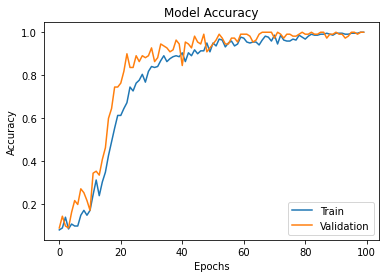

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('money.h5')
model=load_model('money.h5')

10000VND


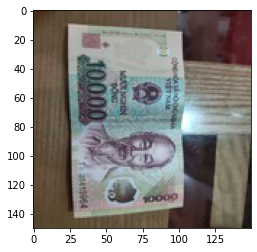

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/007e596942d4838adac5153.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

2000VND


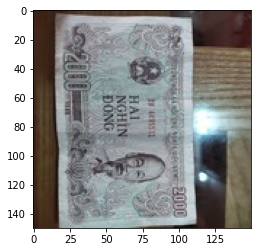

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/12eda40fa0b261ec38a392.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

500VND


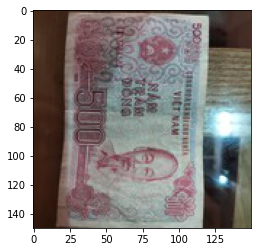

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/476c73ab7516b448ed0731.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

500000VND


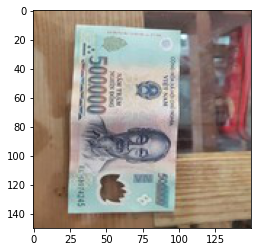

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/5312bae9ab546a0a3345309.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

50000VND


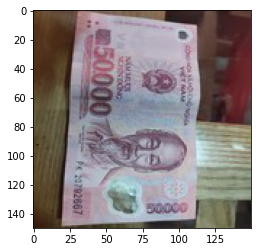

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/7411625a7ae7bbb9e2f6225.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

200VND


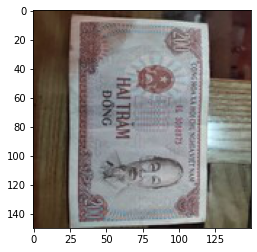

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/7818cb37cb8a0ad4539b343.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

20000VND


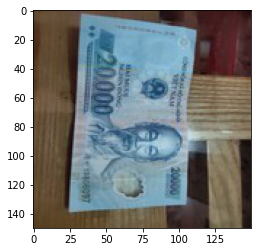

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/8c2105741cc9dd9784d8184.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

200


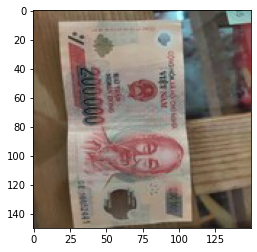

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/8f2453164eab8ff5d6ba274.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

100000VND


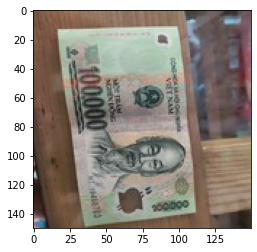

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/ac54c441dbfc1aa243ed251.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

5000VND


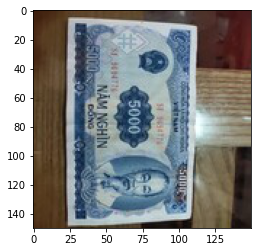

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/a1b55a9e5e239f7dc632130.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)

1000VND


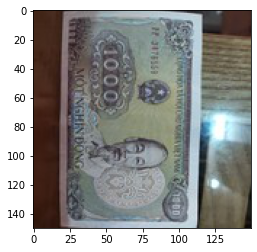

In [ ]:
img=load_img("/content/drive/MyDrive/tiền/MONEY/960d94e0915d5003094c65.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000VND'
if round(result[0][1])==1:
  prediction='10000VND'
if round(result[0][2])==1:
  prediction='1000VND'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='20000VND'
if round(result[0][5])==1:
  prediction='2000VND'
if round(result[0][6])==1:
  prediction='200VND'
if round(result[0][7])==1:
  prediction='500000VND'
if round(result[0][8])==1:
  prediction='50000VND'
if round(result[0][9])==1:
  prediction='5000VND'
if round(result[0][10])==1:
  prediction='500VND'
print(prediction)